In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from scipy import stats

In [2]:
df = pd.read_csv('EEG_Eye_State_Classification.csv')
df.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0

In [3]:
df.describe()

AF3            F7            F3            FC5            T7  \
count   14980.000000  14980.000000  14980.000000   14980.000000  14980.000000   
mean     4321.917777   4009.767694   4264.022433    4164.946326   4341.741075   
std      2492.072174     45.941672     44.428052    5216.404632     34.738821   
min      1030.770000   2830.770000   1040.000000    2453.330000   2089.740000   
25%      4280.510000   3990.770000   4250.260000    4108.210000   4331.790000   
50%      4294.360000   4005.640000   4262.560000    4120.510000   4338.970000   
75%      4311.790000   4023.080000   4270.770000    4132.310000   4347.180000   
max    309231.000000   7804.620000   6880.510000  642564.000000   6474.360000   

                  P7             O1            O2             P8  \
count   14980.000000   14980.000000  14980.000000   14980.000000   
mean     4644.022379    4110.400160   4616.056904    4218.826610   
std      2924.789537    4600.926543     29.292603    2136.408523   
min      2768.210000    2086.150000   4567.180000    1357.950000   
25%      4611.790000    4057.950000   4604.620000    4190.770000   
50%      4617.950000    4070.260000   4613.330000    4199.490000   
75%      4626.670000    4083.590000   4624.100000    4209.230000   
max    362564.000000  567179.000000   7264.100000  265641.000000   

                 T8           FC6            F4             F8            AF4  \
count  14980.000000  14980.000000  14980.000000   14980.000000   14980.000000   
mean    4231.316200   4202.456900   4279.232774    4615.205336    4416.435832   
std       38.050903     37.785981     41.544312    1208.369958    5891.285043   
min     1816.410000   3273.330000   2257.950000      86.666700    1366.150000   
25%     4220.510000   4190.260000   4267.690000    4590.770000    4342.050000   
50%     4229.230000   4200.510000   4276.920000    4603.080000    4354.870000   
75%     4239.490000   4211.280000   4287.180000    4617.440000    4372.820000   
max     6674.360000   6823.080000   7002.560000  152308.000000  715897.000000   

       eyeDetection  
count  14980.000000  
mean       0.448798  
std        0.497388  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


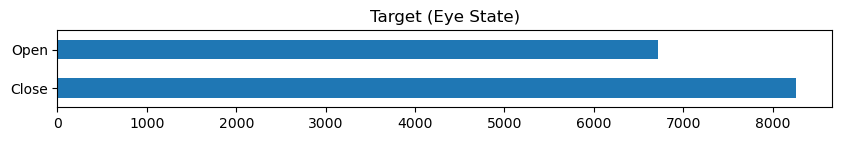

In [5]:
# Display Target 
df['eyeDetection'].value_counts().plot(kind='barh',
                                       title='Target (Eye State)',
                                       figsize=(10, 1))
plt.yticks([0, 1],['Close','Open'])
plt.show()

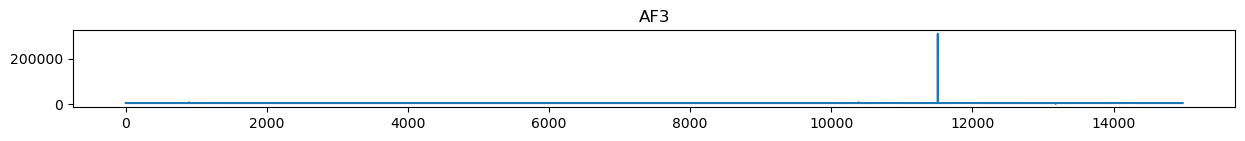

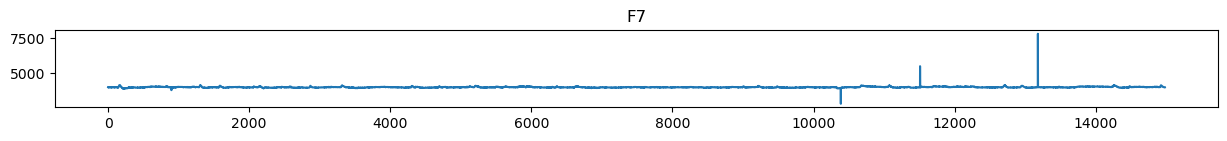

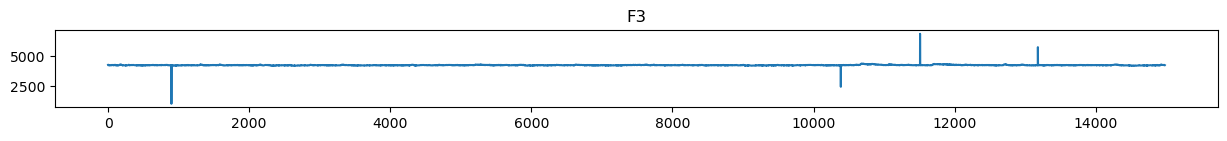

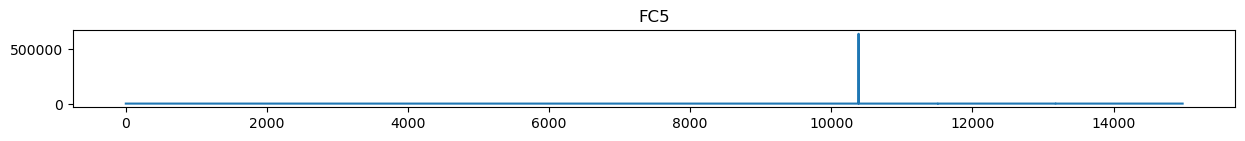

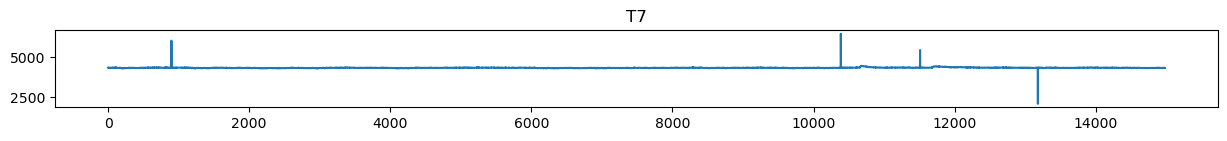

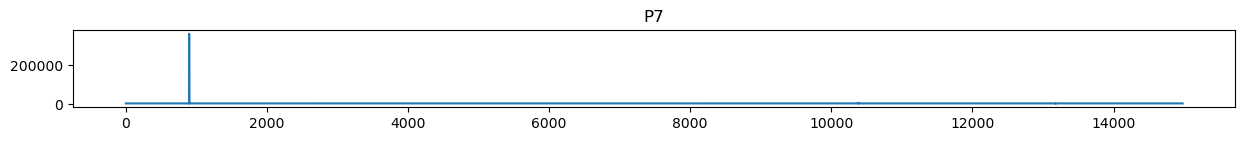

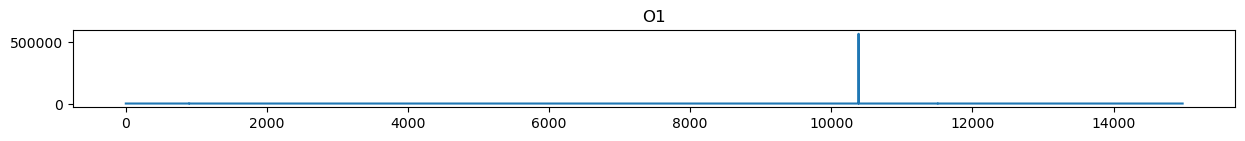

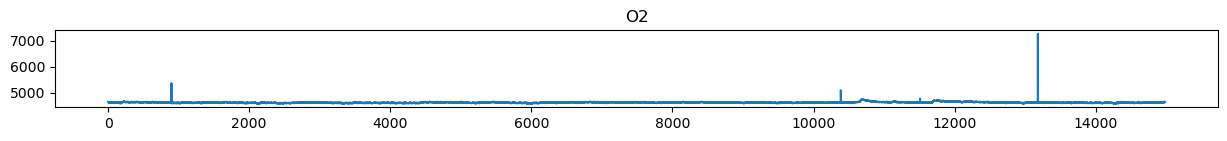

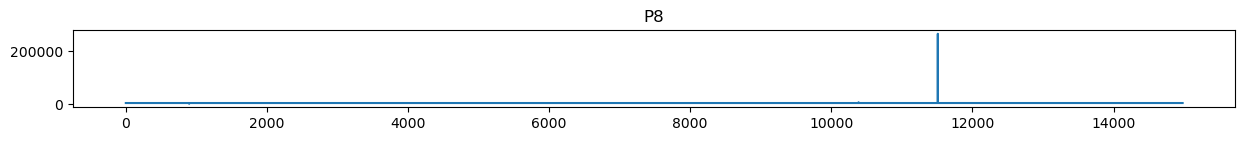

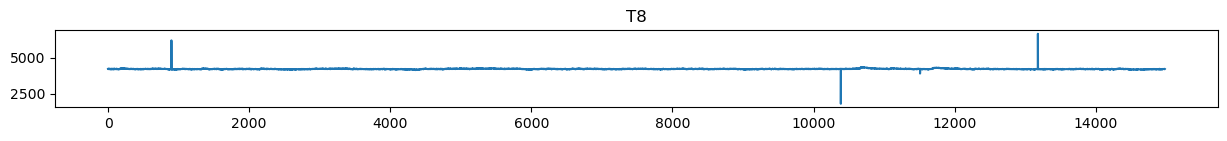

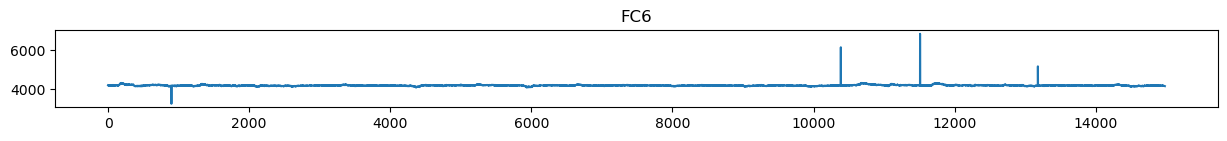

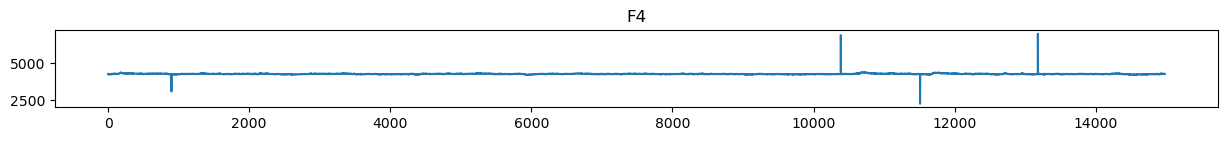

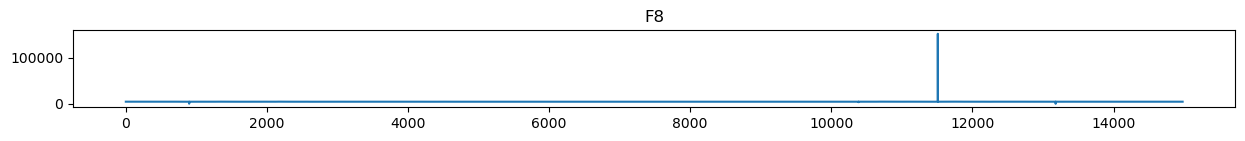

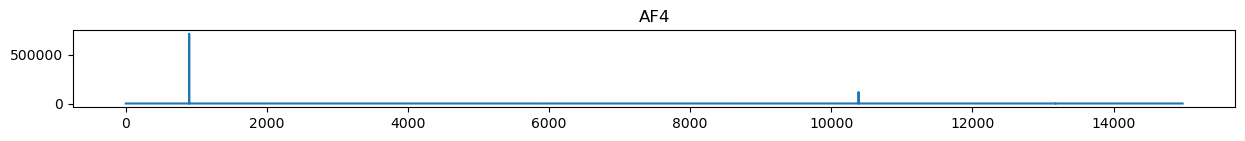

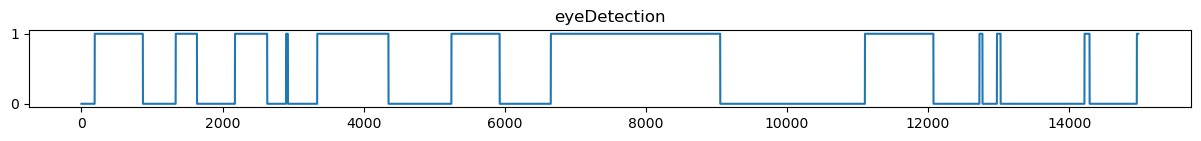

In [6]:
for f in df.columns:
    df[f].plot(figsize=(15, 1), title=f)
    plt.show()

In [7]:
features = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']

In [8]:
# detect and remove outliers
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 10).all(axis=1)
df_filtered1 = df[filtered_entries]
# reset index
df_filtered1 = df_filtered1.reset_index(drop=True)

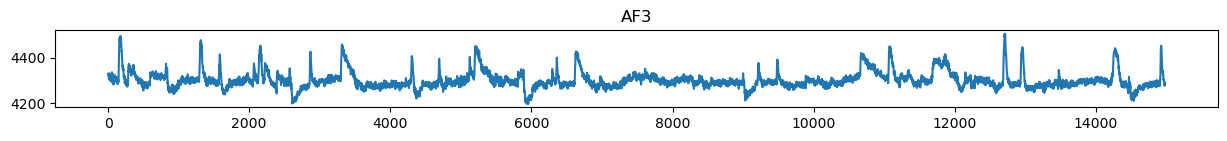

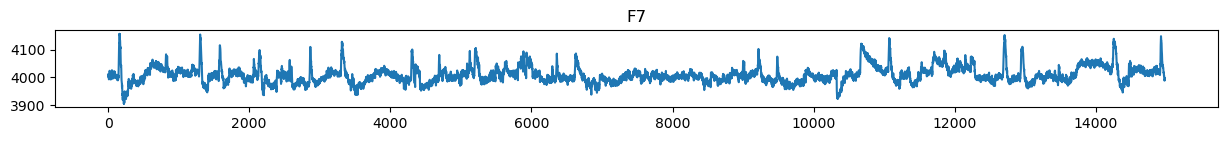

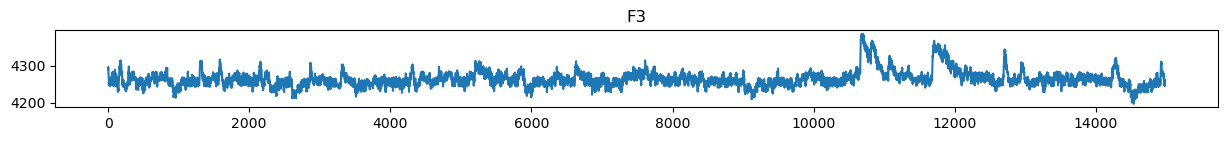

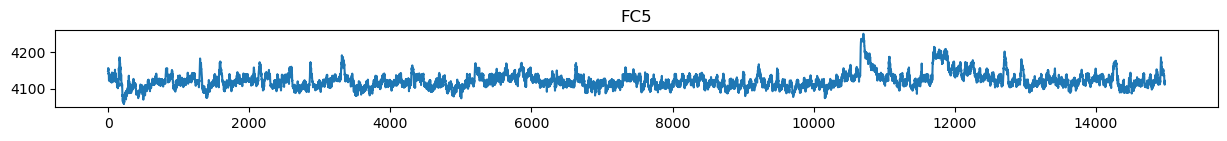

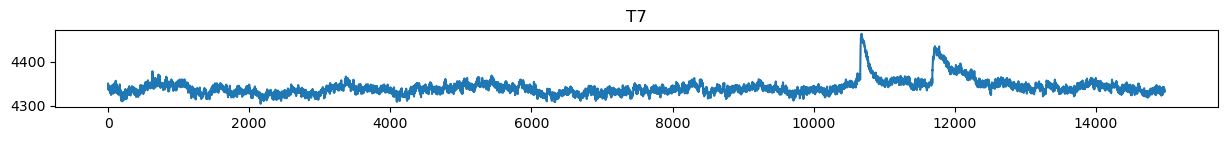

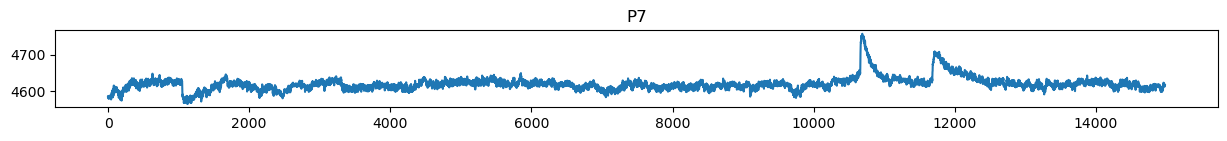

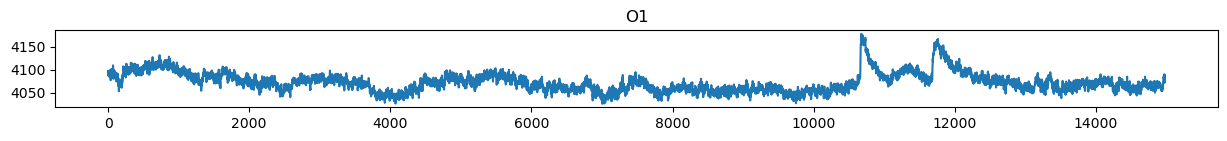

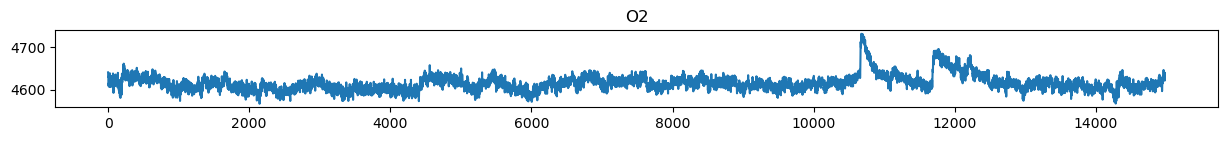

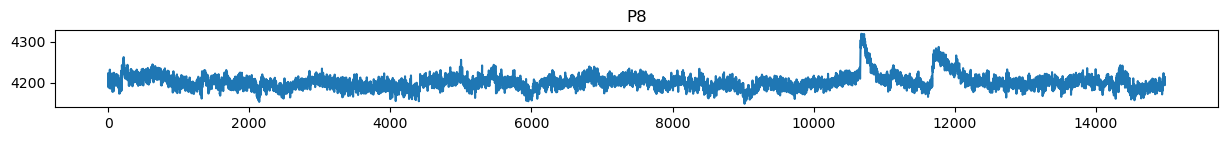

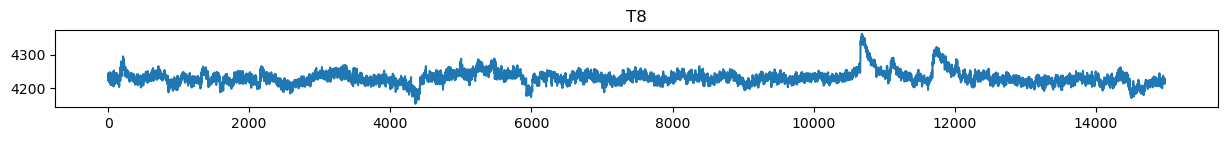

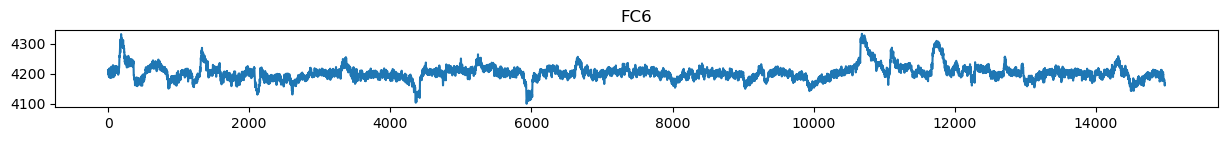

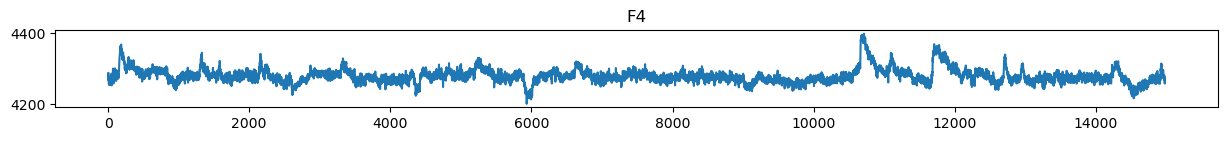

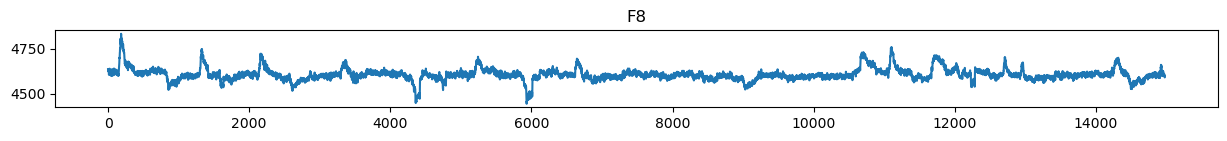

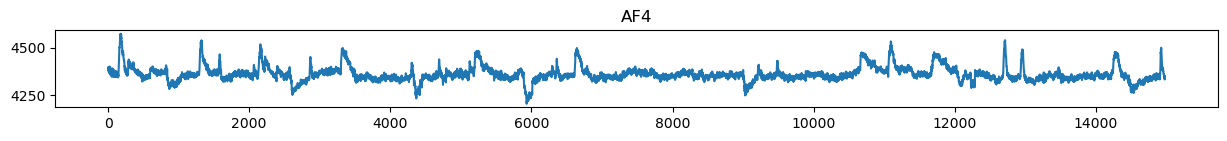

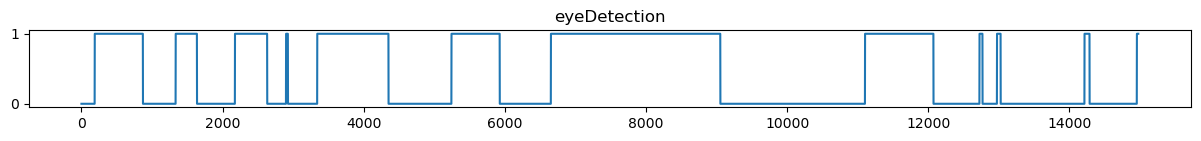

In [9]:
# Display Features after outliers removed
for f in df_filtered1.columns:
    df_filtered1[f].plot(figsize=(15, 1), title=f)
    plt.show()

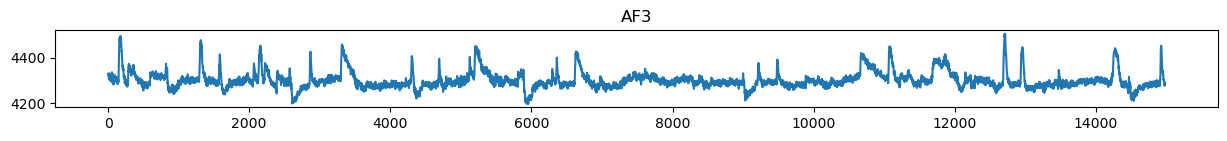

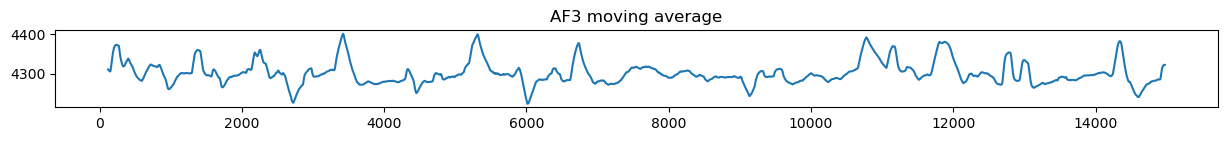

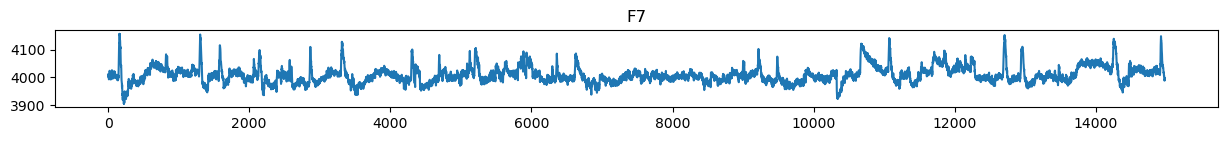

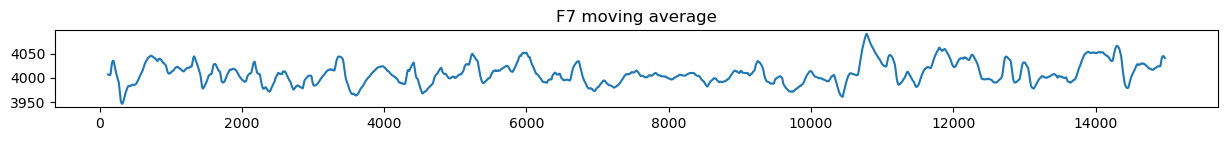

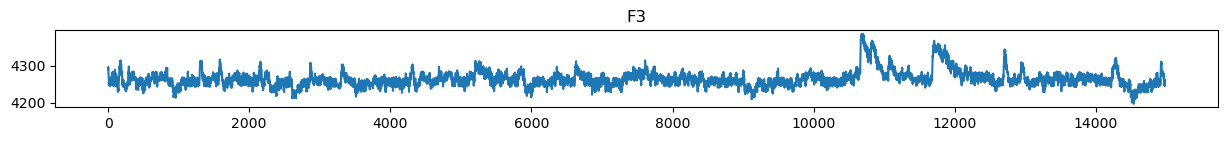

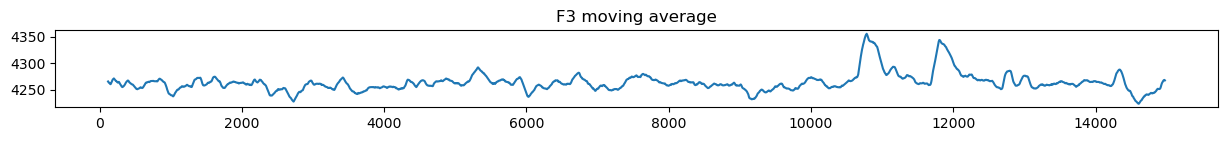

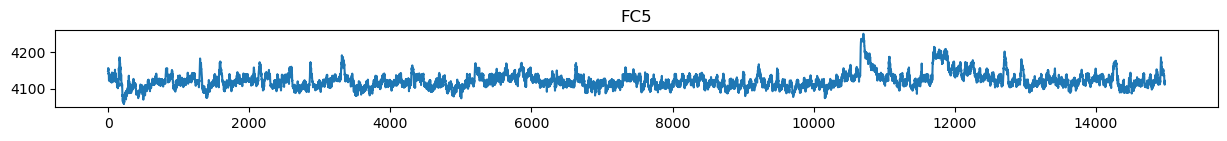

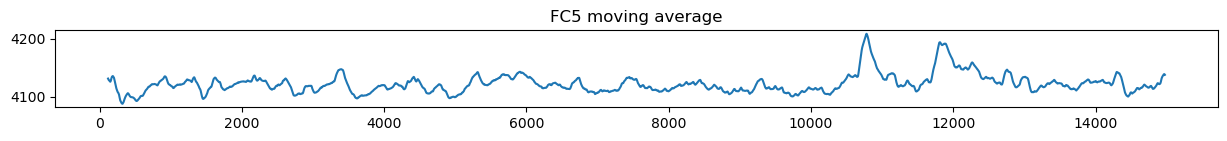

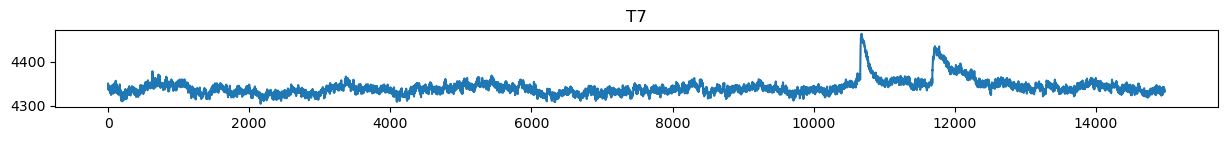

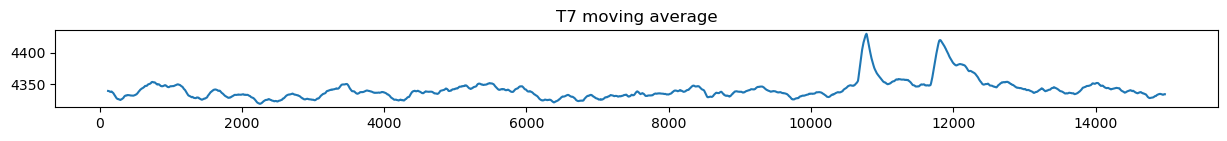

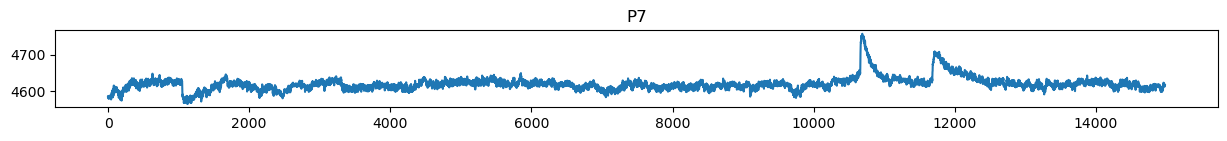

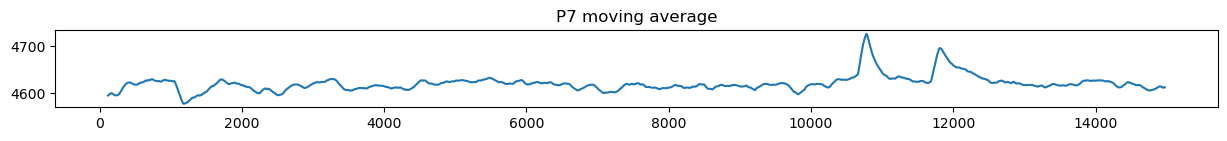

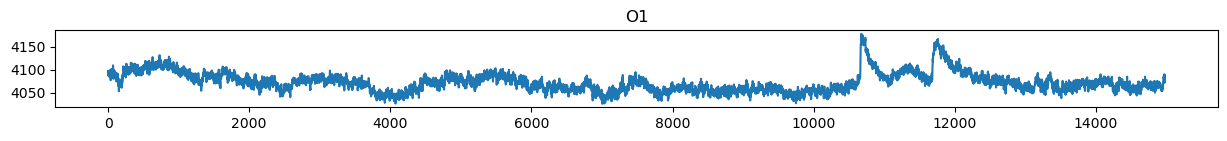

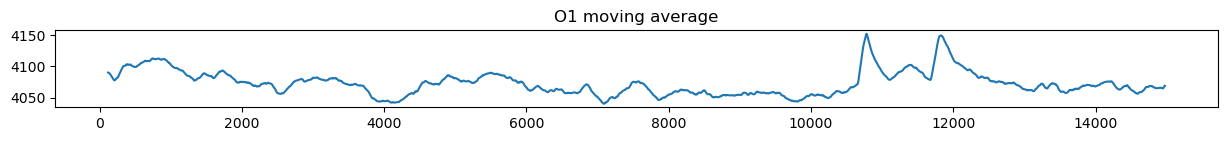

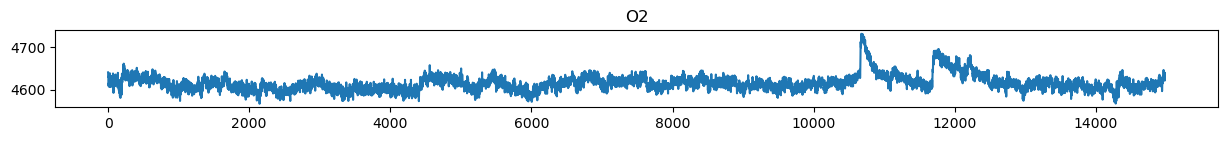

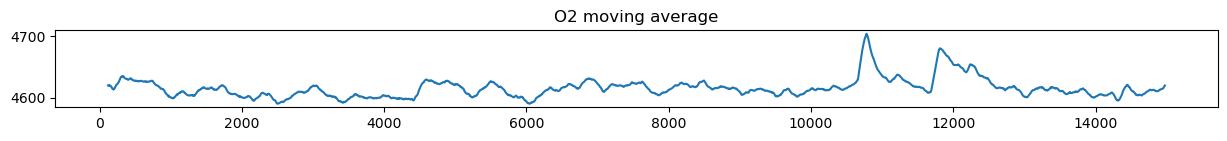

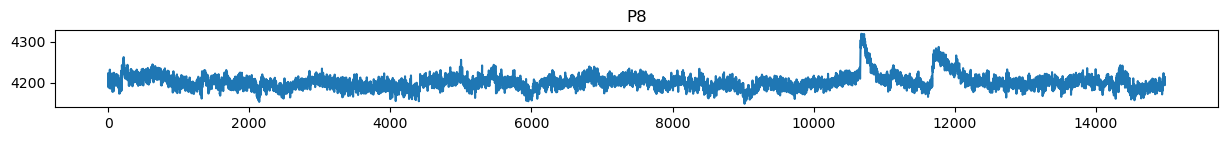

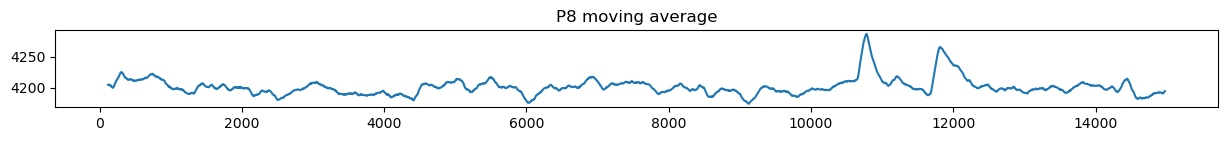

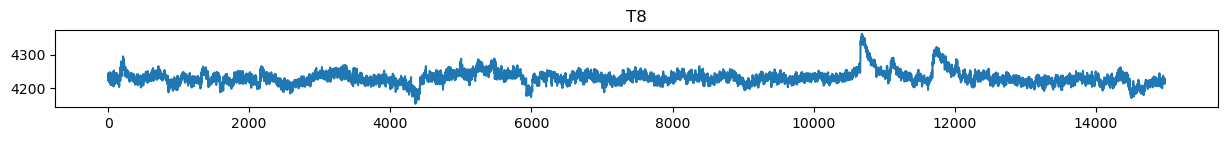

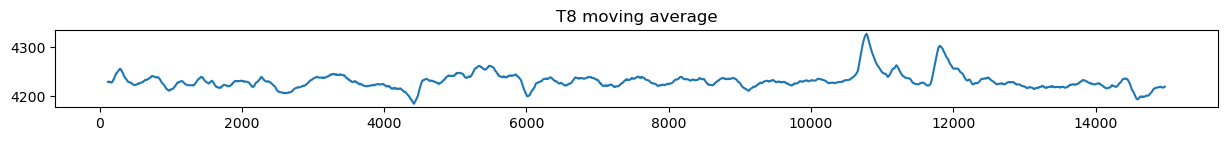

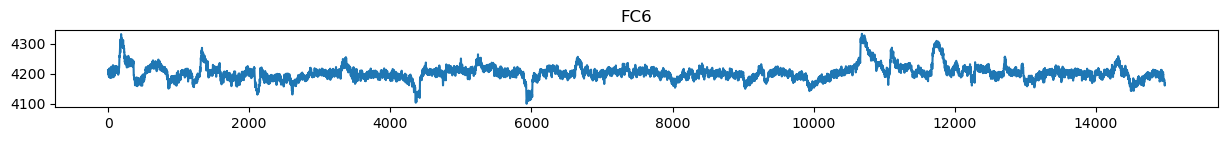

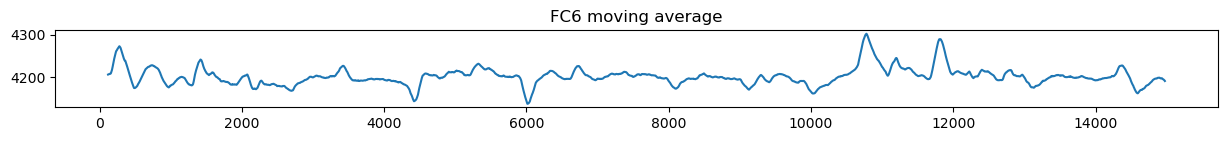

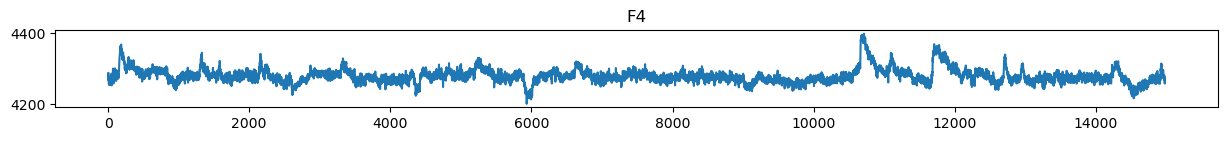

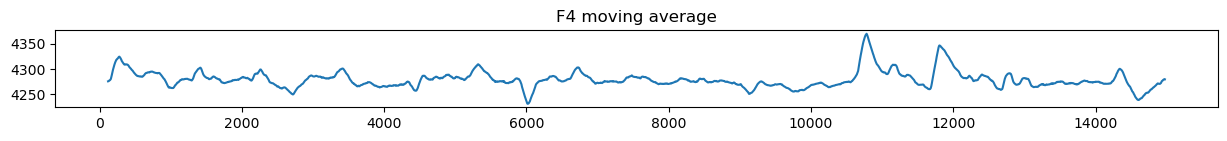

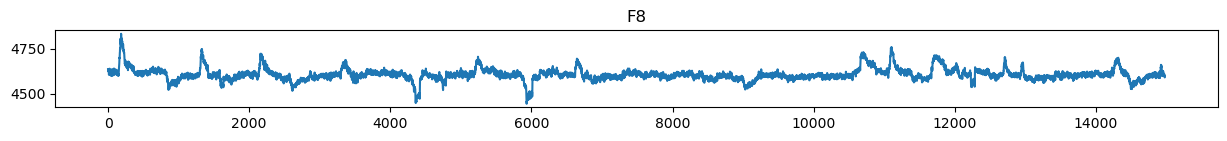

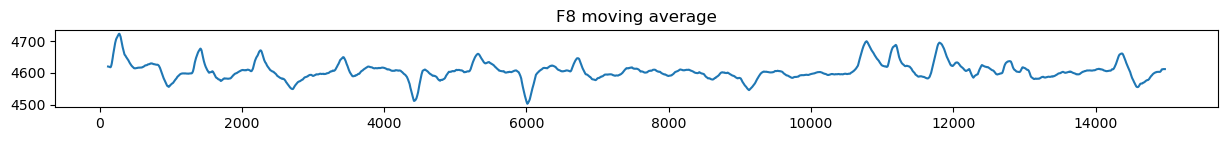

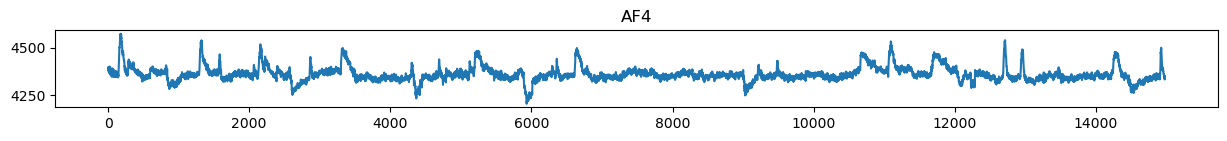

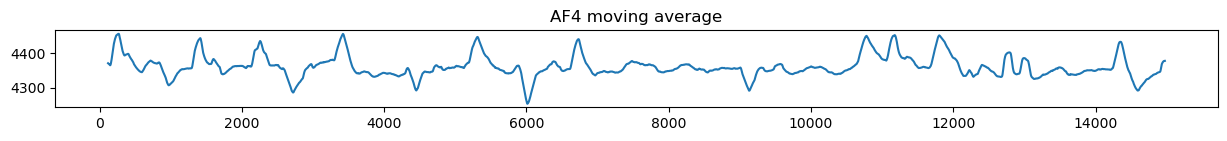

In [10]:
df_ma = df_filtered1[features].copy()
for f in features:
    df_ma[f] = df_filtered1[f].rolling(window=120, center=False).mean()
    df_filtered1[f].plot(figsize=(15, 1), title=f)
    plt.show()
    df_ma[f].plot(figsize=(15, 1), title=f'{f} moving average')
    plt.show()

In [11]:
df_ma['eyeDetection'] = df_filtered1['eyeDetection'].copy()

# Last 20 percent of data will be used for validation
data_length = len(df_ma)
print("Total data length:",data_length)
valid_data_length = data_length//5
print("Validation data length:",valid_data_length)
train_data = df_ma.loc[:data_length-valid_data_length,:].copy()
print("Train data length:",len(train_data))

validation_data = df_ma.loc[data_length-valid_data_length:,:].copy()

# Training data
X_train = train_data[features]
y_train = train_data["eyeDetection"]
# Validation data
X_valid = validation_data[features]
y_valid = validation_data["eyeDetection"]

Total data length: 14976
Validation data length: 2995
Train data length: 11982


In [12]:
# import model 
import lightgbm as lgbm 
# import metric for measuring binary classification performance
from sklearn.metrics import f1_score
# F1 score : best = 1, worst = 0

# Model basic configuration
model_learning_rate = 0.05
model_n_jobs = 4

In [13]:
# Function for comparing different parameters
def score_model(X_train, X_valid, y_train, y_valid, model_n_estimators):
    # create model
    i_model = lgbm.LGBMClassifier(n_estimators=model_n_estimators,
                                  learning_rate=model_learning_rate, 
                                  n_jobs=model_n_jobs, random_state=0)
    # Preprocessing of training data, fit model 
    i_model.fit(X_train, y_train)
    # Preprocessing of validation data, get predictions
    preds = i_model.predict(X_valid)
    return f1_score(y_valid, preds)

[LightGBM] [Info] Number of positive: 6443, number of negative: 5539
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 11982, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537723 -> initscore=0.151180
[LightGBM] [Info] Start training from score 0.151180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

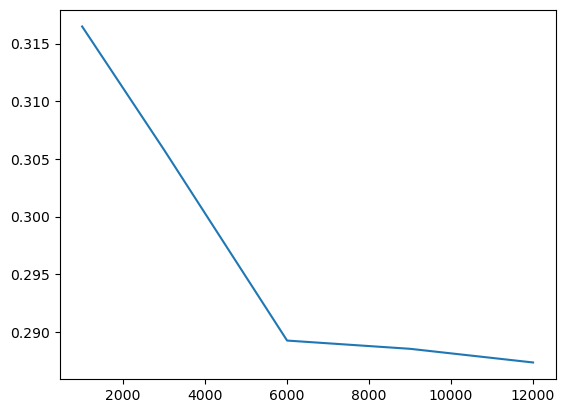

In [14]:
# Test different n_estimators
my_n_estimators = [1000, 3000, 6000, 9000, 12000]
results1 = {i:score_model(X_train, X_valid, y_train, y_valid, i) for i in my_n_estimators}

# Display result
%matplotlib inline
plt.plot(list(results1.keys()), list(results1.values()))
plt.show()

[LightGBM] [Info] Number of positive: 6443, number of negative: 5539
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 11982, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537723 -> initscore=0.151180
[LightGBM] [Info] Start training from score 0.151180
[LightGBM] [Info] Number of positive: 6443, number of negative: 5539
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 11982, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537723 -> initscore=0.151180
[LightGBM] [Info] Start training from score 0.151180
[LightGBM] [In

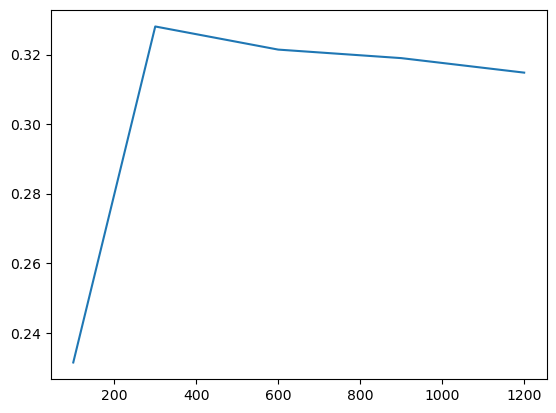

In [15]:
# Test different n_estimators
my_n_estimators = [100, 300, 600, 900, 1200]
results2 = {i:score_model(X_train, X_valid, y_train, y_valid, i) for i in my_n_estimators}

# Display result
%matplotlib inline
plt.plot(list(results2.keys()), list(results2.values()))
plt.show()

In [16]:
# collect all results
all_results = results1 
all_results.update(results2)

# get the best n_estimators
n_estimators_best = max(all_results, key = all_results.get)
print("best estimators :",n_estimators_best)

best estimators : 300


In [17]:
# Create best model
best_model = lgbm.LGBMClassifier(n_estimators=n_estimators_best,
                                 learning_rate=model_learning_rate, 
                                 n_jobs=model_n_jobs, random_state=0)
# fit model 
best_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6443, number of negative: 5539
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 11982, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537723 -> initscore=0.151180
[LightGBM] [Info] Start training from score 0.151180


LGBMClassifier(learning_rate=0.05, n_estimators=300, n_jobs=4, random_state=0)

f1 score: 0.32811211871393237


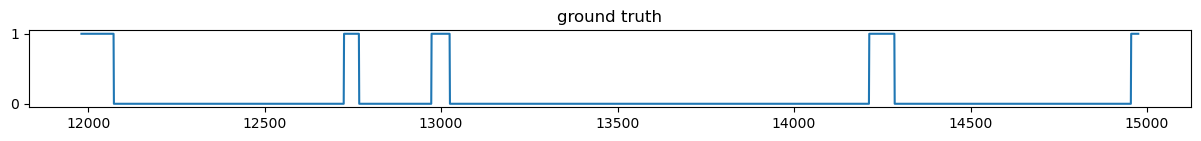

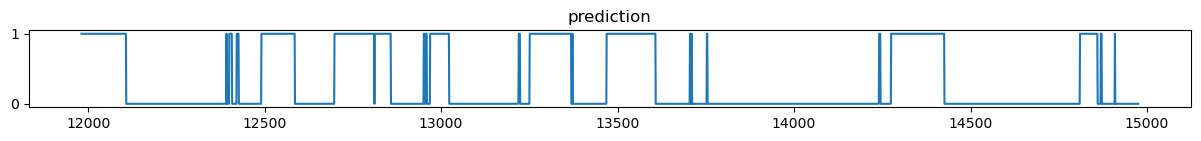

In [18]:
# Get predictions
preds = best_model.predict(X_valid)

# Get model F1 score
score = f1_score(y_valid, preds)
print('f1 score:', score)

# Compare result
compare_data = pd.DataFrame()
compare_data['eyeDetection'] = validation_data["eyeDetection"].copy()
compare_data['prediction'] = preds

compare_data['eyeDetection'].plot(figsize=(15, 1), title='ground truth')
plt.show()
compare_data['prediction'].plot(figsize=(15, 1), title='prediction')
plt.show()

